# Automatic extraction of time series features 

In order to correlate the CNN model performance with the properties of the groundwater time series, different libraries are applied ( kats, tsfresh, tsfel and tsfeatures) to rapidly obtain different parameters that allow us to understand and interpret the modeled results. 


In [1]:
%matplotlib notebook
import pandas as pd
import geopandas as gpd
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from tsfeatures import tsfeatures
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tsfresh import extract_features

In [2]:
#Read Pickle
rpath="D:/Data/students/mariana/data"
GWfilldatamod=pd.read_pickle(rpath+"/Pickle/GWfilldatamod2.pkl")
gw_sel_int=gpd.read_file(rpath+"/SHP/gw_sel_int.shp")
gw_sel_int['r2+NSE']=gw_sel_int['r2']+gw_sel_int['NSE']
gw_sel_int['r2_2+NSE_2']=gw_sel_int['r2_2']+gw_sel_int['NSE_2']

## Extract features available in TSfeatures library

__Stability , lumpiness__: Stability and lumpiness are two time series features based on tiled (non-overlapping) windows. Means or variances are produced for all tiled windows. Then stability is the variance of the means, while lumpiness is the variance of the variances.

In [3]:
#List of available features
ltsfeatures=['unique_id', 'series_length', 'stability', 'trend', 
             'seasonal_strength', 'seas_pacf', 'flat_spots', 
             'x_acf1', 'x_acf10', 'seas_acf1']
for i in ltsfeatures:
    gw_sel_int[i]=np.nan

### Feature extraction per well

In [ ]:
cou=0
for dfraw in GWfilldatamod.GW_NN:
    
    df=dfraw[[dfraw.columns[0],dfraw.columns[-1]]]
    df["unique_id"]=[dfraw.columns[-1]]*len(df)  #give the unique code as the library requested it 
    
    #well id as an integer to search in the gw_sel file--> shapefile witht the well locations
    wellid=int(dfraw.columns[-1].split("_")[-1])
    cou+=1
    indv=gw_sel_int[gw_sel_int.MEST_ID==wellid].index[0]
    
    #Copy the dataframe to avoid modifications in the original one. 
    dfc=df.copy()
    dfc.rename(columns={dfraw.columns[0]: "ds", dfraw.columns[-1]: "y"}, inplace=True)
    feat=tsfeatures(dfc, freq=30, features=ltsfeatures)
    
    for c in ltsfeatures:
        gw_sel_int.at[indv,c]=feat[c][0] 
    
    

Exception in thread Thread-5:
Traceback (most recent call last):
  File "E:\condaenvs\mgo\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "E:\condaenvs\mgo\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "E:\condaenvs\mgo\lib\multiprocessing\pool.py", line 519, in _handle_workers
    cls._wait_for_updates(current_sentinels, change_notifier)
  File "E:\condaenvs\mgo\lib\multiprocessing\pool.py", line 499, in _wait_for_updates
    wait(sentinels, timeout=timeout)
  File "E:\condaenvs\mgo\lib\multiprocessing\connection.py", line 884, in wait
    ready_handles = _exhaustive_wait(waithandle_to_obj.keys(), timeout)
  File "E:\condaenvs\mgo\lib\multiprocessing\connection.py", line 816, in _exhaustive_wait
    res = _winapi.WaitForMultipleObjects(L, False, timeout)
ValueError: need at most 63 handles, got a sequence of length 98


In [161]:
gw_sel_int.columns

Index(['MEST_ID', 'MS_LBEZ', 'MS_MSA_ID', 'UTM_X', 'UTM_Y', 'MS_EIG', 'MS_BTR',
       'MS_GOKNN', 'MS_FOK', 'MS_FUK', 'BGR_NSE_R2', 'BGR_REFERE',
       'KLIGL_GRUP', 'AUSWAHL_KL', 'AUSWERTUNG', 'CD_ID_1', 'CD_ID_2', 'NSE',
       'r2', 'NSE_2', 'r2_2', 'diffr2', 'diffNSE', 'GOK_NN', 'FOK', 'dist_pww',
       'prop_211', 'prop_231', 'prop_312', 'prop_112', 'prop_311',
       'ho2_30m_sd', 'ho3_30m_sd', 'ho4_30m_sd', 'ho2_30m_ds', 'ho3_30m_ds',
       'ho4_30m_ds', 'ho2_30m_lp', 'ho3_30m_lp', 'ho4_30m_lp', 'dist_coast',
       'dist_water', 'impervious', 'imperv_buf', 'geomorphol', 'geomorph_1',
       'geo_1011', 'geo_114', 'geo_111', 'geo_115', 'geo_1012', 'geo_1021',
       'recharge_b', 'lai01_buff', 'lai06_buff', 'lai0106_bu', 'geometry',
       'unique_id', 'hurst', 'series_length', 'unitroot_pp', 'unitroot_kpss',
       'hw_alpha', 'hw_beta', 'hw_gamma', 'stability', 'nperiods',
       'seasonal_period', 'trend', 'spike', 'linearity', 'curvature', 'e_acf1',
       'e_acf10', 'se

## Extract features available in tsfresh library

__Sample entropy__: Approximate Entropy and Sample Entropy are two algorithms for determining the regularity of series of data based on the existence of patterns. (ncbi.nlm.nih.gov/pmc/articles/PMC7515030/) 

__cid_ce__: This function calculator is an estimate for a time series complexity [1] (A more complex time series has more peaks, valleys etc.). 

__autocorrelation__:Calculates the autocorrelation of the specified lag

__Partial correlation__: is a method used to describe the relationship between two variables whilst taking away the effects of another variable, or several other variables, on this relationship.

__number_of_peaks__: Calculates the number of peaks of at least support n in the time series x. A peak of support n is defined as a subsequence of x where a value occurs, which is bigger than its n neighbours to the left and to the right.

__Lempel–Ziv complexity__ : The Lempel-Ziv complexity (LZ) is a popular tool to quantify the uncertainty contained in time series data. In particular, LZ measures how “diverse” are the patterns that are present in a particular signal. (https://information-dynamics.github.io/complexity/information/2019/06/26/lempel-ziv.html)

__Matrix profile__ : The distance profile is a vector of minimum Z-Normalized Euclidean Distances.The profile index contains the index of its first nearest-neighbor. In other words, it is the location of its most similar sub-sequence. (https://towardsdatascience.com/introduction-to-matrix-profiles-5568f3375d90) 

In [ ]:
#List of features with high-correlation according to previous checks
lfeatures=['y__longest_strike_below_mean','y__longest_strike_above_mean',
              'y__fourier_entropy__bins_3', 'y__matrix_profile__feature_"mean"__threshold_0.98',
                'y__sample_entropy', 'y__cid_ce__normalize_True', 'y__autocorrelation__lag_6', 
               'y__lempel_ziv_complexity__bins_3','y__partial_autocorrelation__lag_3', 
               'y__number_peaks__n_10', 'y__approximate_entropy__m_2__r_0.5']

In [ ]:

for dfraw in GWfilldatamod.GW_NN:
    df=dfraw[[dfraw.columns[0],dfraw.columns[-1]]]
    df["id"]=[dfraw.columns[-1]]*len(df)  #give the unique code as the library requested it 
    
    #well id as an integer to search in the gw_sel file--> shapefile witht the well locations
    wellid=int(dfraw.columns[-1].split("_")[-1])
    indv=gw_sel_int[gw_sel_int.MEST_ID==wellid].index[0]
    
    #Copy the dataframe to avoid modifications in the original one. 
    dfc=df.copy()
    dfc.rename(columns={dfraw.columns[0]: "time", dfraw.columns[-1]: "y"}, inplace=True)
    feat=extract_features(dfc, column_id="id", column_sort="time")
    
    for c in lfeatures:
        gw_sel_int.at[indv,c]=feat[c][0] 

## Extract Spearmann coefficient

In [ ]:
#Join list of features
all_features=ltsfeatures+lfeatures

In [15]:
perfor=['r2','NSE', 'r2_2', 'NSE_2','r2+NSE','r2_2+NSE_2']

#Create dataframe to store the correlations
lzero=np.zeros(len(all_features))
d = {'variable': all_features, 'r2': lzero,'NSE':lzero, 'r2_2':lzero, 'NSE_2':lzero}
dfrval = pd.DataFrame(data=d)
dfslope = pd.DataFrame(data=d)
spearm =pd.DataFrame(data=d)
kendalltau= pd.DataFrame(data=d)
#gw_sel_intc=gw_sel_int.copy()

for p in perfor:
    lslope, lrvalue,spearv, kendv = [],[],[],[]
    
    for col in all_features:
        slope, intercept, r_value, p_value, std_err = stats.linregress(gw_sel_int[col], 
                                                                       gw_sel_int[p])
        lrvalue.append(round(r_value,2)) if p_value <= 0.1 else lrvalue.append(0)
        lslope.append(round(slope,2))
        
        
        #Spearman's rank correlation coefficient
        spear, pvalspear=stats.spearmanr(gw_sel_int[col], gw_sel_int[p])
        spearv.append(round(spear,2)) if pvalspear <= 0.1 else spearv.append(0)
        
        #Kendall's tau 
        kendall, pvalkendall=stats.kendalltau(gw_sel_int[col], gw_sel_int[p])
        kendv.append(round(kendall,2)) if pvalkendall <= 0.1 else kendv.append(0)
                        
    dfslope[p]=lslope
    dfrval[p]=lrvalue
    pval[p]=pvalue
    
    spearm[p]=spearv
    kendalltau[p]=kendv
    

hurst
series_length
unitroot_pp
unitroot_kpss
hw_alpha
hw_beta
hw_gamma
stability
trend
spike
linearity
curvature
e_acf1
e_acf10
seasonal_strength
peak
trough
x_pacf5
diff1x_pacf5
diff2x_pacf5
seas_pacf
nonlinearity
lumpiness
alpha
beta
arch_acf
garch_acf
arch_r2
garch_r2
flat_spots
entropy
crossing_points
arch_lm
x_acf1
x_acf10
diff1_acf1
diff1_acf10
diff2_acf1
diff2_acf10
seas_acf1
hurst
series_length
unitroot_pp
unitroot_kpss
hw_alpha
hw_beta
hw_gamma
stability
trend
spike
linearity
curvature
e_acf1
e_acf10
seasonal_strength
peak
trough
x_pacf5
diff1x_pacf5
diff2x_pacf5
seas_pacf
nonlinearity
lumpiness
alpha
beta
arch_acf
garch_acf
arch_r2
garch_r2
flat_spots
entropy
crossing_points
arch_lm
x_acf1
x_acf10
diff1_acf1
diff1_acf10
diff2_acf1
diff2_acf10
seas_acf1
hurst
series_length
unitroot_pp
unitroot_kpss
hw_alpha
hw_beta
hw_gamma
stability
trend
spike
linearity
curvature
e_acf1
e_acf10
seasonal_strength
peak
trough
x_pacf5
diff1x_pacf5
diff2x_pacf5
seas_pacf
nonlinearity
lumpiness


In [20]:
dfrvalcc=dfrval.copy()
dfrvalcc.rename(columns={"r2": "r$^2$_rh", "NSE": "NSE_rh",
                         "r2_2":"r$^2$","NSE_2":"NSE",
                         "r2+NSE":"r$^2$+NSE_rh","r2_2+NSE_2":"r$^2$+NSE"}, inplace=True)

In [25]:
dfaux=dfrvalcc[(dfrvalcc["r$^2$"] > -0.2)]
dfaux2=dfaux[(dfaux["r$^2$"] < 0.2)]
dfaux3=dfaux2[(dfaux2["NSE"] > -0.2)]
dfaux4=dfaux3[(dfaux3["NSE"] < 0.2)]
dfrvalcc2 = dfrvalcc.drop(dfaux4.index)

<IPython.core.display.Javascript object>


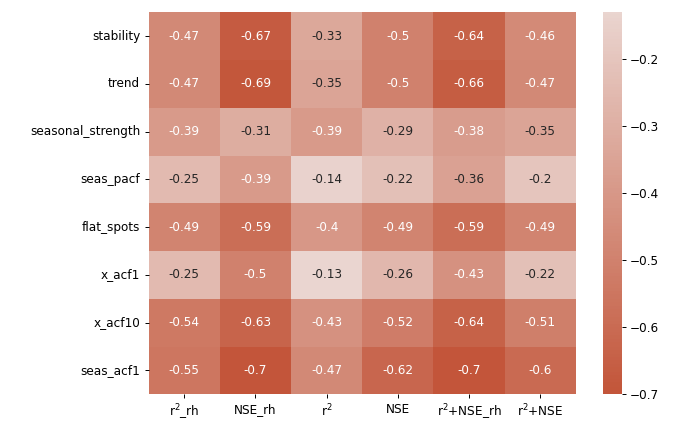

In [62]:
plt.figure(figsize=(8,5))
cmap = sns.diverging_palette(20, 220, as_cmap=True)
sns.heatmap(dfrvalcc2[:].set_index('variable'), annot=False,cmap=cmap, center=0)
plt.ylabel(' ')
plt.tight_layout()